In [1]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc

HEIGHT=16
WIDTH=8
CLASSNUMBER = 32
RESIZED_HEIGHT = 48
RESIZED_WIDTH = 24
TRAIN_CLASS_NUMBER =55
TEST_CLASS_NUMBER=10
VALIDATION_CLASS_NUMBER = 5
TRAIN_DATA_NUMBER = CLASSNUMBER * TRAIN_CLASS_NUMBER
TEST_DATA_NUMBER = CLASSNUMBER*TEST_CLASS_NUMBER
VALIDATION_DATA_NUMBER = CLASSNUMBER * VALIDATION_CLASS_NUMBER


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels

In [9]:
ROOT_PATH = '/home/tang/targa/exp3/'
load_train_data_directory = os.path.join(ROOT_PATH, "16_8_1248_train")
load_test_data_directory = os.path.join(ROOT_PATH, "16_8_1248_validation")
train_data_directory = os.path.join(ROOT_PATH, "padding48_24/train")
test_data_directory = os.path.join(ROOT_PATH, "padding48_24/test")

In [10]:
trainImages,trainLabels = load_data(load_train_data_directory)
testImages,testLabels = load_data(load_test_data_directory)

In [18]:
print('train images length:\t\t{}'.format(len(trainImages)))

print('test images length:\t\t{}'.format(len(testImages)))



train images length:		1246
test images length:		411


In [15]:
from PIL import Image, ImageOps

top, bottom = [int((RESIZED_HEIGHT-HEIGHT)/2)]*2
left, right = [int((RESIZED_WIDTH-WIDTH)/2)]*2

color = [0,0,0]


In [ ]:
i=0
for p in range(0,len(trainImages)):
    
    img = trainImages[i]
    img_with_border = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    
    filename=train_data_directory+ '/' + trainLabels[i] + '/' + trainLabels[i]+str(i)+'.jpg'
    plt.imsave(filename, img_with_border)
    print(filename)
    i+=1

In [22]:
img_with_border.shape

(48, 24, 3)

In [ ]:
i=0
for p in range(0,len(testImages)):
    
    img = testImages[i]
    img_with_border = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    
    filename=test_data_directory+ '/' + testLabels[i] + '/' + testLabels[i]+str(i)+'.jpg'
    plt.imsave(filename, img_with_border)
    print(filename)
    i+=1

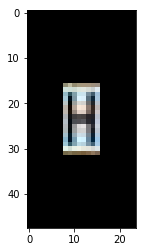

In [25]:
plt.imshow(img_with_border)

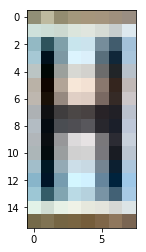

In [26]:
plt.imshow(img)